In [363]:
import pandas as pd
import matplotlib.pyplot as plt

In [364]:
#Realiza a leitura da tabela contida na planilha realizado do Excel
dados_realizado = pd.read_excel('dados.xlsx', sheet_name = 'realizado')

In [365]:
dados_realizado

,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
NaN,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
Realizado,240,280,200,310,230,213,239,210,210,210,232,213


In [366]:
#Realiza a leitura da tabela contida na planilha orcado do Excel
dados_orcado = pd.read_excel('dados.xlsx', sheet_name = 'orcado')

In [367]:
dados_orcado

,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230
3,abril,321
4,maio,283
5,junho,291
6,julho,193
7,agosto,259
8,setembro,289
9,outubro,230


In [380]:
#Realiza a inversão da tabela realizado
dados_realizado = dados_realizado.T

In [381]:
#Reseta o index que estava desorganizado
dados_realizado.reset_index(drop=True, inplace = True)

In [382]:
#Realiza a limpeza da linha (axis = 0) que estava com valor NaN
dados_realizado.dropna(axis=0, how = 'any', inplace = True)

In [383]:
#Renomeia as colunas
dados_realizado.rename(columns = {0: 'mês', 1: 'Realizado'}, inplace = True)

In [384]:
dados_realizado

,mês,Realizado
0,janeiro,240
1,fevereiro,280
2,março,200
3,abril,310
4,maio,230
5,junho,213
6,julho,239
7,agosto,210
8,setembro,210
9,outubro,210


In [385]:
#Realiza o merge
saida = pd.merge(dados_realizado, dados_orcado, on = 'mês', how = 'left')

In [386]:
saida

,mês,Realizado,orcado
0,janeiro,240,330
1,fevereiro,280,290
2,março,200,230
3,abril,310,321
4,maio,230,283
5,junho,213,291
6,julho,239,193
7,agosto,210,259
8,setembro,210,289
9,outubro,210,230


In [387]:
#Adicionada uma nova coluna no DataFrame, e realiza a diferença entre os valores de orçado e de realizado
saida['diff'] = (saida['orcado'].values - saida['Realizado'].values)

In [388]:
saida

,mês,Realizado,orcado,diff
0,janeiro,240,330,90
1,fevereiro,280,290,10
2,março,200,230,30
3,abril,310,321,11
4,maio,230,283,53
5,junho,213,291,78
6,julho,239,193,-46
7,agosto,210,259,49
8,setembro,210,289,79
9,outubro,210,230,20


In [389]:
#Gera o arquivo de saída .csv, e oculta a coluna do índice
saida.to_csv('XP_Lab Desafio - Gustavo Queiroz.csv',index=False)

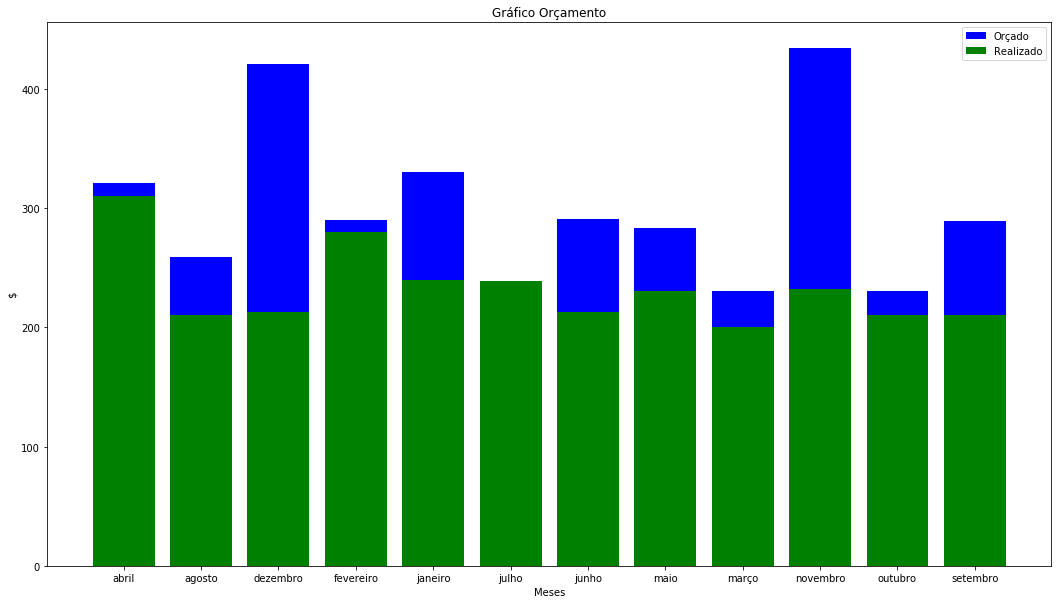

In [390]:
#Código para plotar o gráfico
#Definição do eixo X e eixo Y
x = saida['mês']
y = saida['orcado']
y1 = saida['Realizado']
#Realiza o aumento do tamanho do gráfico para 18 x 10 cm
plt.rcParams['figure.figsize']=(18,10)
#Gera um gráfico de barras, sendo definido as legendas e cores
plt.bar(x,y,label='Orçado',color='blue')
plt.bar(x,y1,label='Realizado',color='green')
#Definição do título do gráfico, e o título dos eixos
plt.title('Gráfico Orçamento')
plt.xlabel('Meses')
plt.ylabel('$')
#Plota as legendas, e salva o gráfico no diretório, realizando a plotagem do mesmo
plt.legend()
plt.savefig('Gráfico Orçado X Realizado.png')